# **Introduction**

This codebase was to created to make it easier for machine learning researchers to create innovation in the medical field. Combining machine learning with the medical field would decrease false diagnoses and save lives.

This codebase is focused on **predicting lung diseases** from a breathing sounds dataset. 8 experiments were conducted on 5 different machine learning models. In addition, a novel data augmentation algorithm was performed and tested.

The following experiments were conducted on 4 classical machine learning methods (decision tree, random forest, SVM, XGBoost):


*   Using all features to train the models
*   Using less complex models to decrease overfitting
* Using class weights to counter dataset unbalancedness
* Using fewer features to decrease noise in the data

Experiments on the deep learning model (CNN) were as follows:

* Using all features to train the model
* Using class weights to counter dataset unbalancedness
* Using a novel data augmentation algorithm



# Project licence

*MIT License*

*Copyright (c) 2020 Richard Annilo*

*Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:*

*The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.*

*THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.*

# Imports

In [6]:
#Data analysis
import pandas as pd
import numpy as np

#Graphing
import matplotlib.pyplot as plt
import seaborn as sns

#Standardizing
from sklearn import preprocessing

#Principal component analysis
from sklearn.decomposition import PCA

#Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Cross validation
from sklearn.model_selection import cross_validate, cross_val_predict

#For evaluating the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

from random import randint, shuffle, seed

In [10]:
root = "respiratory_sound_database/"

# Classical machine learning (ML)

## Preprocessing

In [3]:
#Reading data
all_data = pd.read_csv(root + "dataframes/all_tabular_data.csv")
classes = pd.read_pickle(root + "dataframes/class-codes-for-per-patient-mfcc.pkl")

In [4]:
#Here are all tabular features and diagnoses for all patients
#This is pre-prepared
all_data

,patient,age,sex,bmi,crackles,wheezes,zero_crossing_rate,spectral_centroid_mean,spectral_centroid_median,spectral_centroid_std,...,spectral_rolloff_85_median,spectral_rolloff_85_std,spectral_rolloff_75_mean,spectral_rolloff_75_median,spectral_rolloff_75_std,spectral_flatness_mean,spectral_flatness_median,spectral_flatness_std,spectral_entropy,diagnosis
0,101,3.00,0,19.385777,0.000000,0.000000,0.002713,146.551481,135.855248,61.455844,...,102.282715,104.563370,73.353923,64.599609,55.733985,3.749142e-06,2.188023e-06,0.000008,9.143678,5
1,102,0.75,0,18.389942,0.000000,0.000000,0.003031,197.777325,187.539653,63.049716,...,161.499023,129.124686,103.710235,75.366211,87.366072,7.673706e-06,4.801093e-06,0.000008,8.496269,3
2,104,70.00,0,28.470000,0.009500,0.065150,0.007286,149.458585,123.613367,95.038534,...,218.920898,228.061253,185.988189,116.638184,174.092799,2.647871e-07,2.324849e-09,0.000006,10.405459,2
3,105,7.00,0,17.558299,0.000000,0.000000,0.069309,1092.148070,1147.489130,216.221842,...,1754.956055,601.826815,1389.510767,1550.390625,432.260171,5.737754e-04,5.362760e-04,0.000372,12.188940,5
4,106,73.00,0,21.000000,0.200700,0.175750,0.007756,405.075250,380.033249,180.290639,...,336.456299,521.688671,236.951230,164.190674,172.703812,2.629885e-04,1.687654e-04,0.000292,9.723333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,221,74.00,0,29.000000,0.126058,0.247383,0.003041,127.813532,119.158537,58.227103,...,137.722778,118.081860,89.020819,66.842651,65.982144,2.517377e-06,1.281133e-06,0.000010,8.128614,2
117,222,60.00,1,28.890000,0.065367,0.036433,0.001961,88.856447,75.580731,54.860390,...,71.777344,139.503106,56.630067,43.066406,65.928248,2.966836e-07,2.086953e-10,0.000011,9.722198,2
118,224,10.00,0,15.795393,0.000000,0.000000,0.002395,225.201549,200.689195,115.959811,...,80.749512,127.925877,57.539402,53.833008,49.853650,1.463903e-05,6.089167e-06,0.000044,8.945704,3
119,225,0.83,1,14.243974,0.000000,0.000000,0.003059,163.351050,133.352034,95.327831,...,86.132812,201.884572,87.887115,53.833008,88.783025,4.653738e-06,2.074980e-06,0.000009,8.690406,3


In [5]:
#Here are the features included
print(list(all_data.columns))
len(list(all_data.columns))

['patient', 'age', 'sex', 'bmi', 'crackles', 'wheezes', 'zero_crossing_rate', 'spectral_centroid_mean', 'spectral_centroid_median', 'spectral_centroid_std', 'root_mean_square_mean', 'root_mean_square_median', 'root_mean_square_std', 'spectral_rolloff_85_mean', 'spectral_rolloff_85_median', 'spectral_rolloff_85_std', 'spectral_rolloff_75_mean', 'spectral_rolloff_75_median', 'spectral_rolloff_75_std', 'spectral_flatness_mean', 'spectral_flatness_median', 'spectral_flatness_std', 'spectral_entropy', 'diagnosis']


24

Let's look at the distribution of classes.

In [6]:
class_list = list(classes[0]) #For convenience
print(class_list)
classes

['Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'Pneumonia', 'URTI']


,0
0,Bronchiectasis
1,Bronchiolitis
2,COPD
3,Healthy
4,Pneumonia
5,URTI


<BarContainer object of 6 artists>

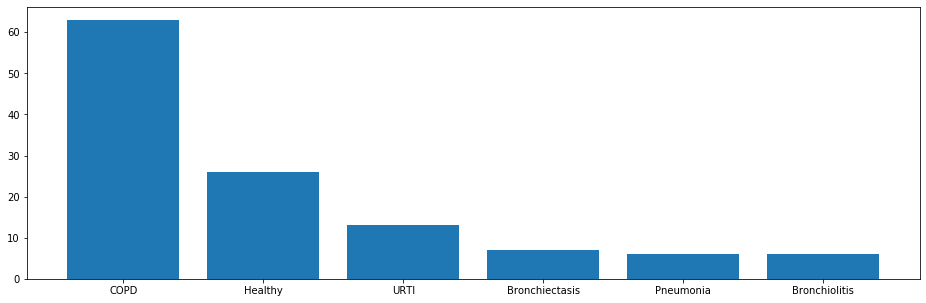

In [7]:
indexes = list(all_data.diagnosis.value_counts().index)
value_counts = list(all_data.diagnosis.value_counts())
x_vals = [classes.loc[i][0] for i in indexes]
plt.figure(figsize=(16,5))
plt.bar(x_vals, value_counts)

Does not look too good. COPD has more than 10 times more patients in our dataset than Bronchiolitis or Pneumonia. This will most likely impact the performance of our models, because they will want to focus on predicting COPD while ignoring Bronchiolitis.

In [8]:
all_data.diagnosis.value_counts()

2    63
3    26
5    13
0     7
4     6
1     6
Name: diagnosis, dtype: int64

The results are gathered by running 5-fold cross validation 10 times and box-plotting the results. This is done in order for the results to be as robust as possible and not be varying because of randomness. Only one 5-fold CV appeared to be quite susceptible to random fluctuations.

The main metric to compare models against each other was chosen to be the macro average of F1-score. F1-score because it takes into account both recall and precision. Macro average, because it takes each class with equal weight no matter how many samples there are in each class. Because our data is very imbalanced.

In [13]:
def normalize_and_shuffle(all_data):
    _all_data = all_data.sample(frac=1)
    data_x = _all_data.iloc[:, 1:-1]
    data_y = _all_data.diagnosis
    standard_data_x = preprocessing.scale(data_x.to_numpy())
    return standard_data_x, data_y

standard_data_x, data_y = normalize_and_shuffle(all_data)

## Experiment 1. Training and evaluating with all of the data

In [14]:
#TODO: random forest on halvem sest minority klassid. joonista sama plot accuracyga.
models = [
    ("Decision tree", DecisionTreeClassifier()),
    ("Random forest", RandomForestClassifier(n_estimators=300, max_samples=0.3, max_features=0.9)),
    ("XGBoost", XGBClassifier(learning_rate=0.1, n_estimators=91, min_child_weight=3, max_depth=4, gamma=0.1, reg_alpha=0.01)),
    ("Random forest", RandomForestClassifier(n_estimators=300)),
    ("SVM", SVC(kernel="sigmoid", gamma=0.02, C=46))
]

In [15]:
scoring = {'f1_macro': 'f1_macro',
          'f1_micro': 'f1_micro',
          'accuracy':'accuracy'}

In [16]:
#The following are global variables

times = 10 #The number of times we will run cross validation

f1_scores = {} #F1-macro-averages
f1_micros = {} #F1-micro-averages
f1_train_scores = {} #F1-train-marco-averages
y_preds = {} #Predicted diagnoses
estimators = {} #The models that are trained during cross validation
y_actuals = list(data_y)*times #The acutual diagnoses

In [17]:
for item in models:    
    name = item[0]
    model = item[1]
    temp_f1 = []
    temp_f1_micro = []
    temp_y_preds = []
    temp_f1_train = []
    temp_estimators = []
    
    for _ in range(times):
        #random shuffle
        standard_data_x, data_y = normalize_and_shuffle(all_data)
        
        cv = cross_validate(estimator=model, 
                            X=standard_data_x, 
                            y=data_y, 
                            cv=5, #Number of folds
                            scoring=scoring, 
                            verbose=0, 
                            return_train_score=True,
                            return_estimator=True) #Returns scores
        cv_pred = cross_val_predict(estimator=model, X=standard_data_x, y=data_y, cv=5) #Returns predictions
        temp_f1.extend(cv["test_f1_macro"])
        temp_f1_micro.extend(cv["test_f1_micro"])
        temp_f1_train.extend(cv["train_f1_macro"])
        temp_estimators.extend(cv["estimator"])
        temp_y_preds.extend(cv_pred)
        
    f1_scores[name] = temp_f1
    f1_micros[name] = temp_f1_micro
    f1_train_scores[name] = temp_f1_train
    y_preds[name] = temp_y_preds
    if (item == "SVM"):
        print(temp_y_preds)
    estimators[name] = temp_estimators

In [18]:
#Plots boxplots
def plot_boxplots(xticks, data, font_scale = 1.5, figsize = (16,7), title = "Untitled graph", ylabel = "F1 macro-average", rotation = 0, baseline = 0.1, models=None, order=None, palette=None):
    
    temp_xticks = xticks.copy()
    temp_data = data.copy()
    
    if (models != None):
        for x in xticks:
            if (x not in models):
                i = xticks.index(x)
                temp_xticks.remove(x)
                temp_data.remove(data[i])
    
    plt.figure(figsize=figsize)
    sns.set(font_scale=font_scale)
    
    all_pal = {"Decision tree": "maroon", 
              "Decision tree (class weights)": "indianred", 
              "Decision tree (fewer features)": "r", 
              "SVM": "darksalmon", 
              "SVM (class weights)": "coral", 
              "SVM (fewer features)": "orangered", 
              "XGBoost": "royalblue", 
              "XGBoost (class weights)": "steelblue", 
              "XGBoost (fewer features)": "skyblue", 
              "Random forest": "darkgreen", 
              "Random forest (class weights)": "forestgreen", 
              "Random forest (fewer features)": "lightgreen"}

    graph = sns.violinplot(data=temp_data, order=order, palette=palette, inner="points")
    plt.xticks(plt.xticks()[0], temp_xticks)
    
    graph.axhline(baseline, color="black", linestyle="--")
    graph.text(x = -0.4, y = baseline+0.02, s="majority class baseline", fontsize=15)
    
    plt.title(title)
    plt.ylabel(ylabel)
    #plt.plot(color="pink")
    #graph.set_ylim([0.05,0.9])
    graph.set_xticklabels(graph.get_xticklabels(), rotation=rotation)

In [19]:
#Plots confusion matrices
def plot_confusion_matrix(y_pred, y_true, classes, title = "Untitled confusion matrix", rotation = 0):
    cm = confusion_matrix(y_pred=y_pred, y_true=y_true)
    df_cm = pd.DataFrame(cm, index = classes, columns = classes)
    plt.figure(figsize = (10,7))
    plt.title(title)
    graph = sns.heatmap(df_cm, annot=True, fmt='g')
    graph.set_xticklabels(graph.get_xticklabels(), rotation=rotation)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

In [20]:
#Sorting dictionary by average value and separating keys and values.
def prepare_dict(d):
    #Source: https://stackoverflow.com/questions/30558440/sorting-a-dictionary-by-average-of-list-in-value
    keys = []
    for key in sorted(d, key=lambda k: sum(d[k]) / len(d[k]), reverse=True):
        keys.append(key)
    values = [d[key] for key in keys]
    return keys, values

#### Plotting results

In [21]:
keys, values = prepare_dict(f1_scores)

In [22]:
for key, value in zip(keys, values):
    print(key, round(np.array(value).mean(), 4), "+/-", round(np.array(value).std(), 4))

SVM 0.5012 +/- 0.1134
Decision tree 0.4929 +/- 0.1171
XGBoost 0.467 +/- 0.1293
Random forest 0.4092 +/- 0.1012


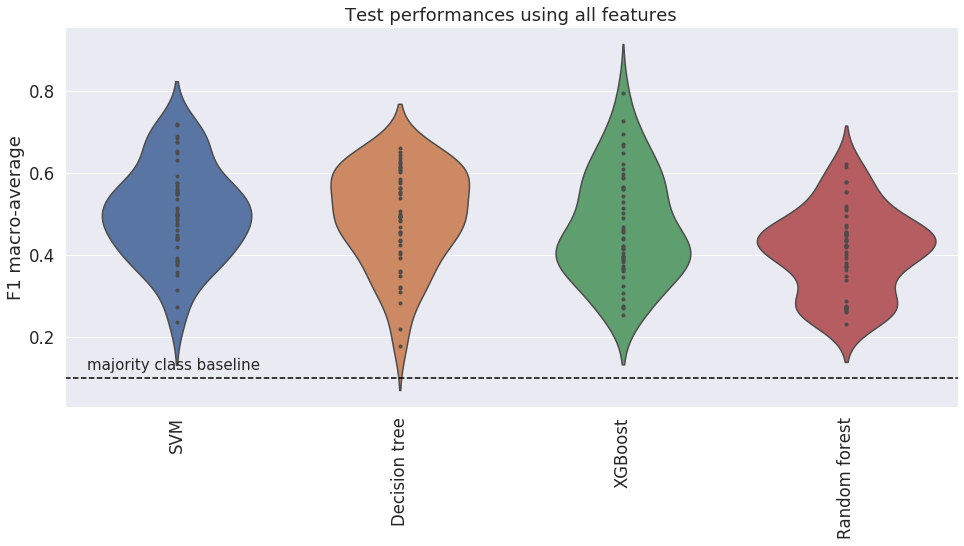

In [23]:
plot_boxplots(keys, values, title="Test performances using all features", rotation=90)

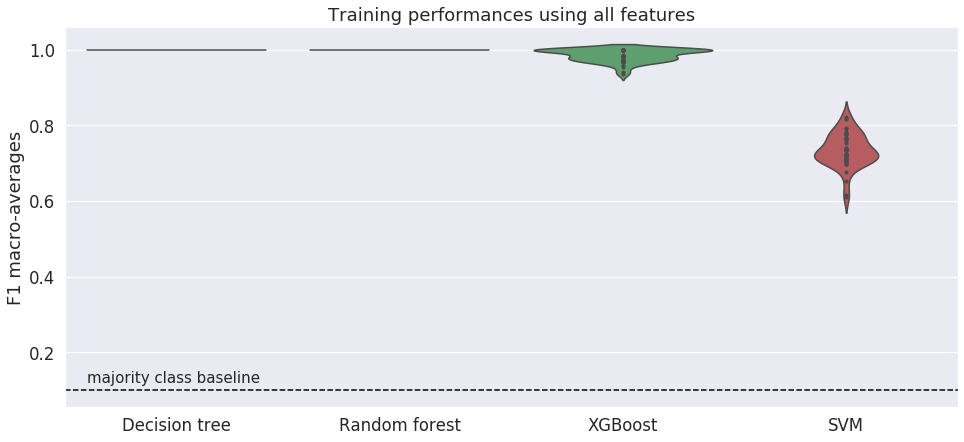

In [24]:
keys, values = prepare_dict(f1_train_scores)
plot_boxplots(keys, values, title="Training performances using all features", ylabel="F1 macro-averages", baseline = 0.1)

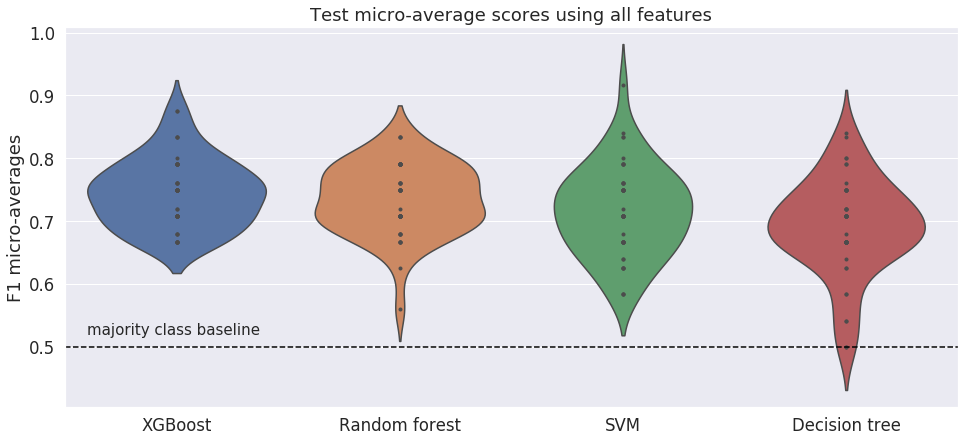

In [25]:
keys, values = prepare_dict(f1_micros)
plot_boxplots(keys, values, title="Test micro-average scores using all features", ylabel="F1 micro-averages", baseline = 0.5)

#### Plotting confusion matrices

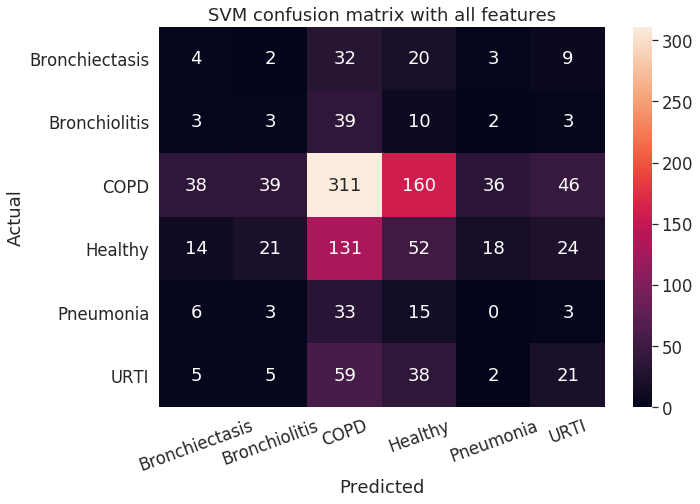

In [26]:
plot_confusion_matrix(y_preds["SVM"], y_actuals, class_list, rotation = 20, title="SVM confusion matrix with all features")

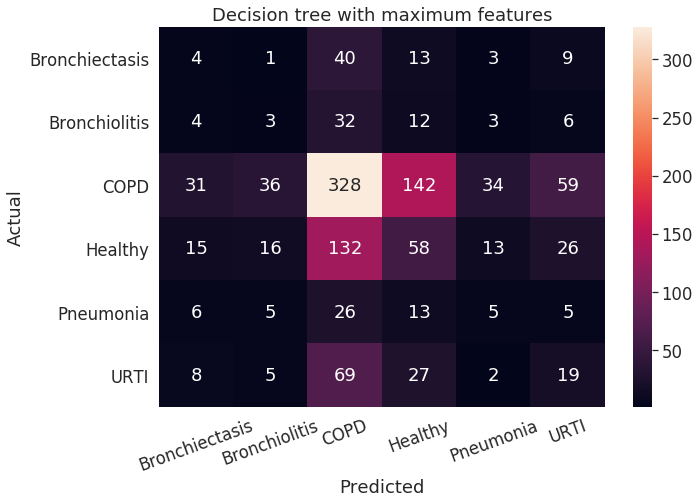

In [27]:
plot_confusion_matrix(y_preds["Decision tree"],
                      y_actuals,
                      class_list,
                      rotation = 20,
                      title="Decision tree with maximum features")

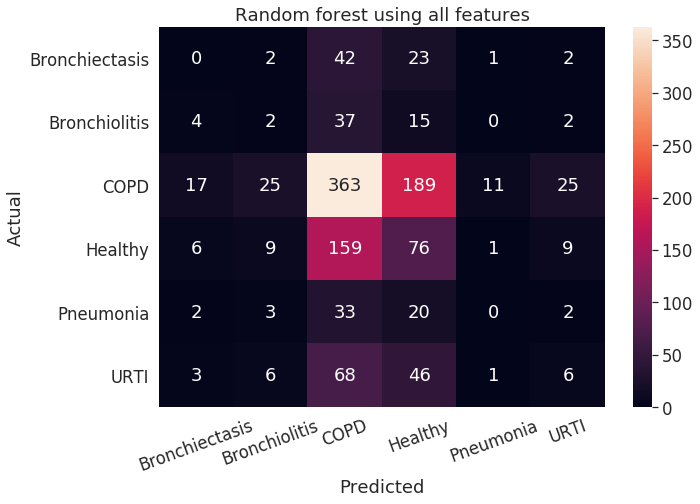

In [28]:
plot_confusion_matrix(y_preds["Random forest"],
                      y_actuals,
                      class_list,
                      rotation = 20,
                      title="Random forest using all features")

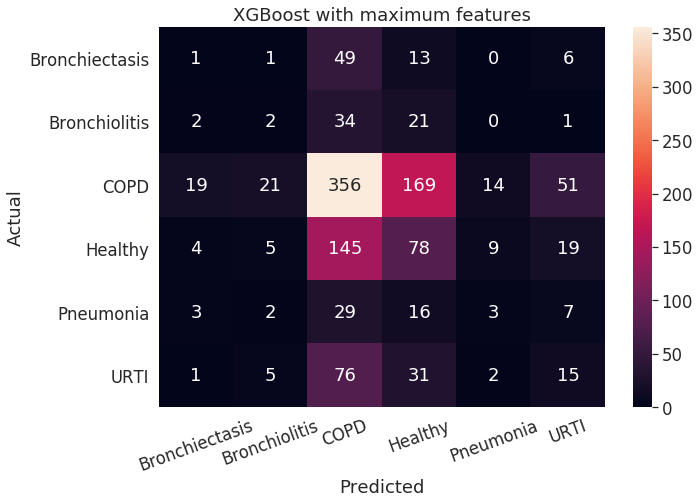

In [29]:
plot_confusion_matrix(y_preds["XGBoost"],
                      y_actuals,
                      class_list,
                      rotation = 20,
                      title="XGBoost with maximum features")

#### PCA analysis

In [30]:
def get_pca_scatterplot(principal_components, data_y, class_list, title="Untitled scatterplot"):
    scat_data = principal_components.copy()
    scat_data["diagnosis"] = data_y
    scat_data.set_index("diagnosis", inplace=True)

    fig, ax = plt.subplots(figsize=(10, 10))
    for i in range(6):
        sns.scatterplot(scat_data.loc[i, :][0], scat_data.loc[i, :][1], s=70)
    sns.set(font_scale=1.3)
    ax.set(ylabel = "", xlabel= "")
    legend1 = ax.legend(class_list,
                        loc="lower right", title="Classes")
    plt.title(title)
    plt.show()

In [32]:
#temp_data = data_x[["crackles", "wheezes", "age", "root_mean_square_mean"]]
temp_data = standard_data_x

In [39]:
n_components = 8
pca = PCA(n_components)
principal_components = pca.fit_transform(temp_data)
print("The", n_components, "components account for", np.sum(pca.explained_variance_ratio_), "of variance")
principal_components = pd.DataFrame(principal_components)
principal_components.head()

The 8 components account for 0.9400544571191471 of variance


,0,1,2,3,4,5,6,7
0,1.573674,2.471882,0.482959,-0.157976,0.068614,-1.400723,0.564081,0.113466
1,2.404766,1.101373,0.841545,-0.612773,-0.528455,-0.735621,1.010939,0.186779
2,2.577396,-1.371847,2.466957,-0.874245,1.278477,0.441898,0.460777,-0.564861
3,2.248798,-0.605560,2.238764,-1.144741,0.453340,-0.154490,2.346036,0.021521
4,-1.735388,-0.056130,-1.306798,0.158953,1.321792,0.276911,0.595194,0.706647


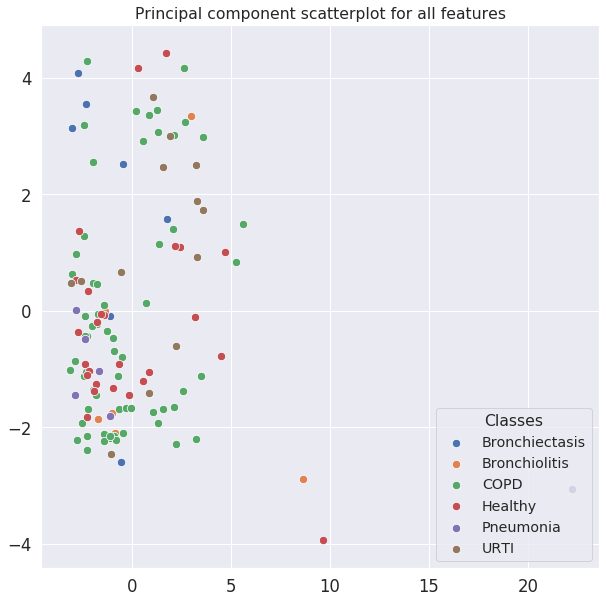

In [38]:
get_pca_scatterplot(principal_components, data_y, class_list, "Principal component scatterplot for all features")

#### Feature importance analysis

In [113]:
#Sum of all importances for all estimators used in cross validation
importances = [0] * len(list(data_x.columns))
for est in estimators["Decision tree"]:
    importance = est.feature_importances_
    for i in range(len(importances)):
        importances[i] += importance[i]

In [114]:
sorted_indices = np.argsort(importances)
sorted_importances = np.sort(importances)

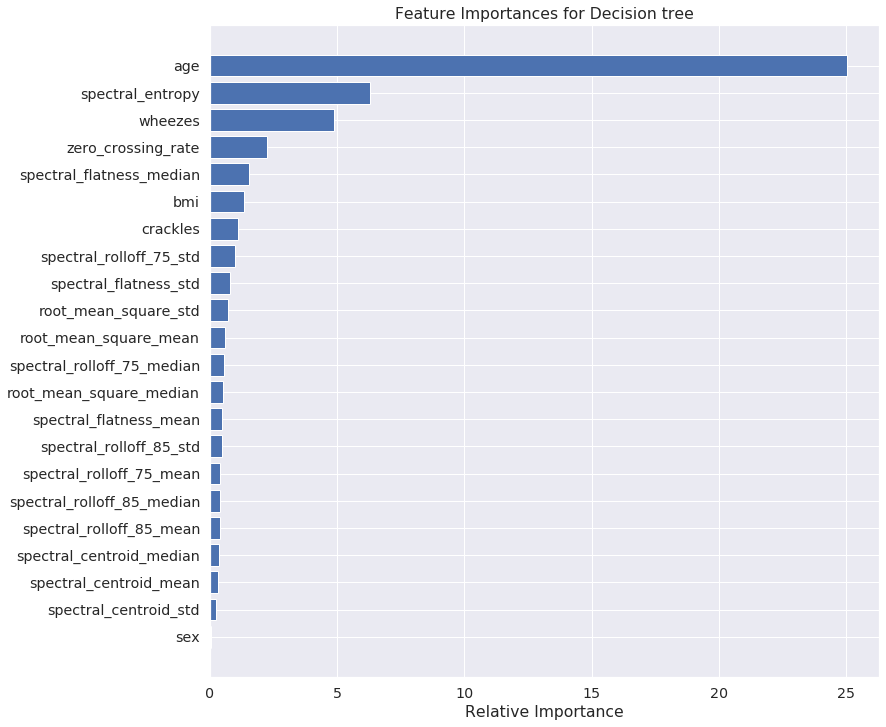

In [115]:
plt.figure(figsize=(12,12))

plt.title('Feature Importances for Decision tree')
plt.barh(range(len(sorted_indices)), sorted_importances, color='b', align='center')
plt.yticks(range(len(sorted_indices)), [data_x.columns[i] for i in sorted_indices])
plt.xlabel('Relative Importance')
plt.show()

In [116]:
#Sum of all importances for all estimators used in cross validation
importances = [0] * len(list(data_x.columns))
for est in estimators["Random forest"]:
    importance = est.feature_importances_
    for i in range(len(importances)):
        importances[i] += importance[i]

In [117]:
sorted_indices = np.argsort(importances)
sorted_importances = np.sort(importances)

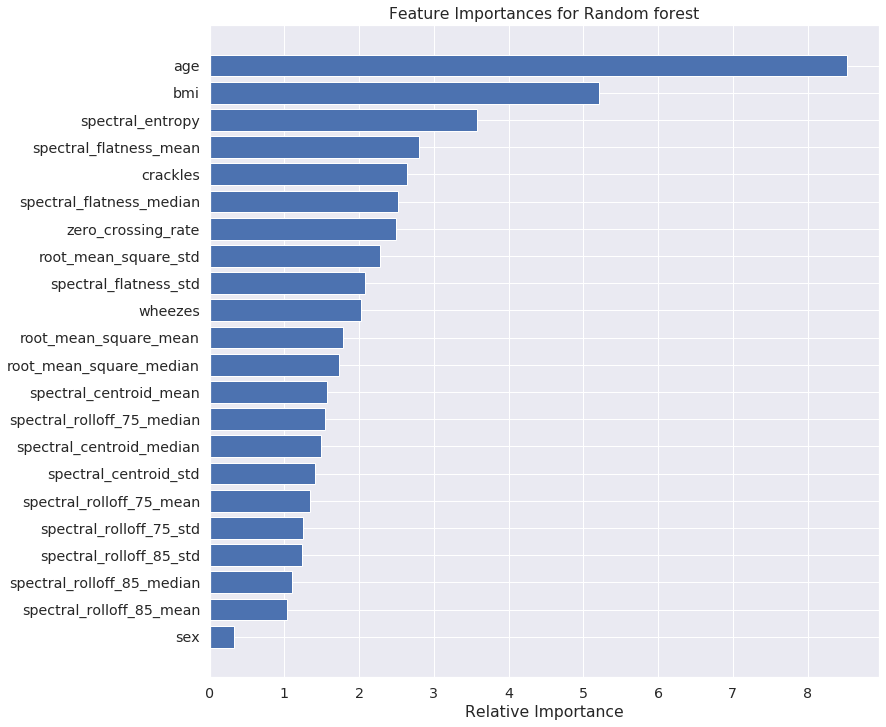

In [118]:
plt.figure(figsize=(12,12))

plt.title('Feature Importances for Random forest')
plt.barh(range(len(sorted_indices)), sorted_importances, color='b', align='center')
plt.yticks(range(len(sorted_indices)), [data_x.columns[i] for i in sorted_indices])
plt.xlabel('Relative Importance')
plt.show()

From this we learn the following:

1. RF and XGBoost are performing worse than DT, because they focus too much on the **majority classes**. A solution to this would be to introduce **class weights**.
2. There are a lot of **irrelevant features**. Removing them might improve the results.

The following 2 experiments aim to amend these issues.

## Experiment 2. Introducing class weights to models

In [119]:
#Generating class weights for each data instance
#Code source "https://stackoverflow.com/questions/45811201/how-to-set-weights-in-multi-class-classification-in-xgboost-for-imbalanced-data"
def CreateBalancedSampleWeights(y_train, largest_class_weight_coef):
    classes = np.unique(y_train, axis = 0)
    classes.sort()
    class_samples = np.bincount(y_train)
    total_samples = class_samples.sum()
    n_classes = len(class_samples)
    weights = total_samples / (n_classes * class_samples * 1.0)
    class_weight_dict = {key : value for (key, value) in zip(classes, weights)}
    class_weight_dict[classes[1]] = class_weight_dict[classes[1]] * 9999999 #largest_class_weight_coef
    sample_weights = [class_weight_dict[y] for y in y_train]
    return sample_weights

largest_class_weight_coef = data_y.value_counts(normalize=1).iloc[0] #occurance rate of most frequent class
weights = CreateBalancedSampleWeights(data_y, largest_class_weight_coef)

In [165]:
models = [
    ("Decision tree (class weights)", DecisionTreeClassifier(class_weight="balanced")),
    ("Random forest (class weights)", RandomForestClassifier(n_estimators=250, class_weight="balanced", max_samples=0.3, max_features=0.9)),
    ("XGBoost (class weights)", XGBClassifier(weigths=weights, learning_rate=0.1, n_estimators=91, min_child_weight=3, max_depth=4, gamma=0.1, reg_alpha=0.01)),
    ("SVM (class weights)", SVC(kernel="sigmoid", C=12, gamma=0.0055, class_weight="balanced")),
]

In [160]:
for item in models:    
    name = item[0]
    model = item[1]
    temp_f1 = []
    temp_f1_micro = []
    temp_y_preds = []
    temp_f1_train = []
    temp_estimators = []
    
    for _ in range(times):
        standard_data_x, data_y = normalize_and_shuffle(all_data)
        cv = cross_validate(estimator=model, 
                            X=standard_data_x, 
                            y=data_y, 
                            cv=5, 
                            scoring=scoring, 
                            verbose=0, 
                            return_train_score=True,
                            return_estimator=True)
        cv_pred = cross_val_predict(estimator=model, X=standard_data_x, y=data_y, cv=5)
        temp_f1.extend(cv["test_f1_macro"])
        temp_f1_micro.extend(cv["test_f1_micro"])
        temp_f1_train.extend(cv["train_f1_macro"])
        temp_estimators.extend(cv["estimator"])
        temp_y_preds.extend(cv_pred)
        
    f1_scores[name] = temp_f1
    f1_micros[name] = temp_f1_micro
    f1_train_scores[name] = temp_f1_train
    y_preds[name] = temp_y_preds
    estimators[name] = temp_estimators

In [161]:
keys, values = prepare_dict(f1_scores)

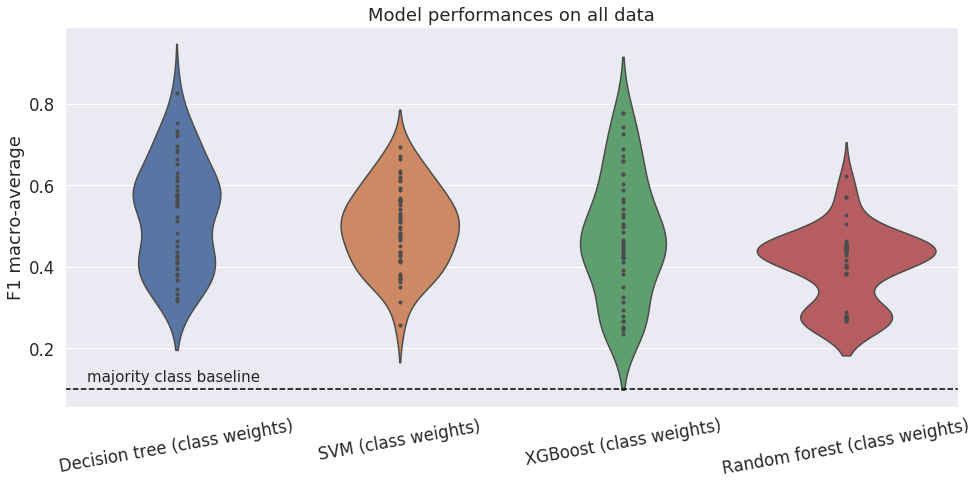

In [162]:
plot_boxplots(keys, values, title="Model performances on all data", rotation=10, models=["Decision tree (class weights)", "Random forest (class weights)", "XGBoost (class weights)", "SVM (class weights)"])

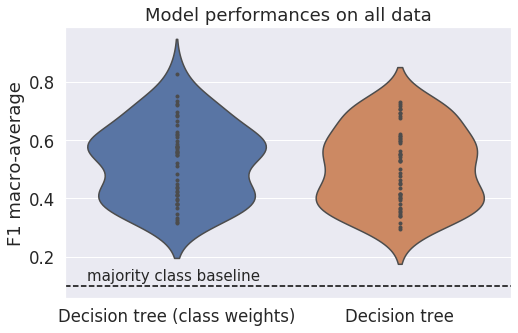

In [142]:
plot_boxplots(keys, values, title="Model performances on all data", models=["Decision tree (class weights)", "Decision tree"], figsize=(8,5))

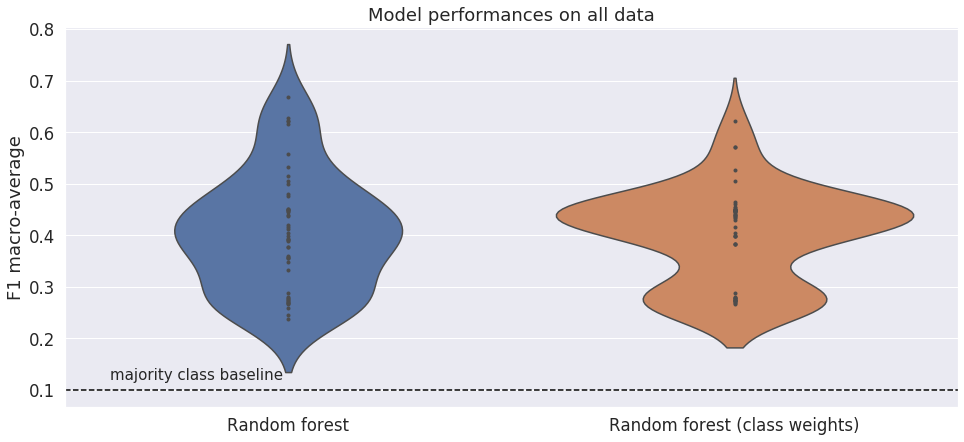

In [143]:
plot_boxplots(keys, values, title="Model performances on all data", models=["Random forest (class weights)", "Random forest (size limit)", "Random forest"])

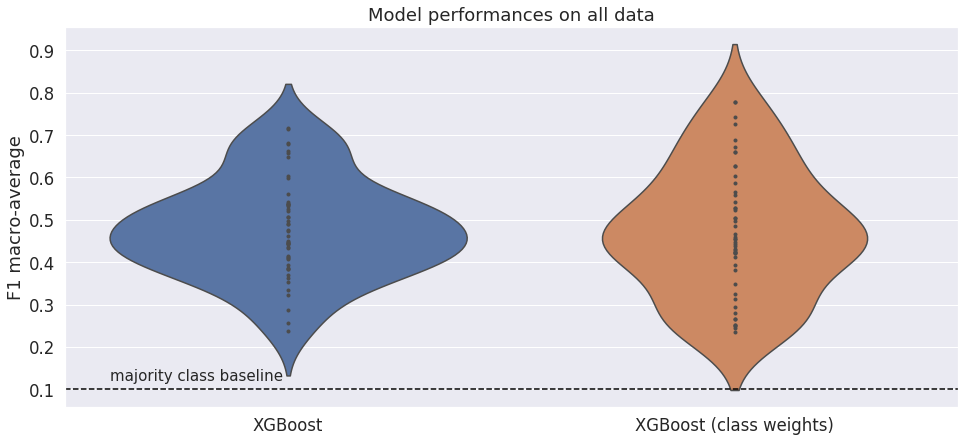

In [144]:
#XGBOOST BOXPLOTS
plot_boxplots(keys, values, title="Model performances on all data", models=["XGBoost (class weights)", "XGBoost"])

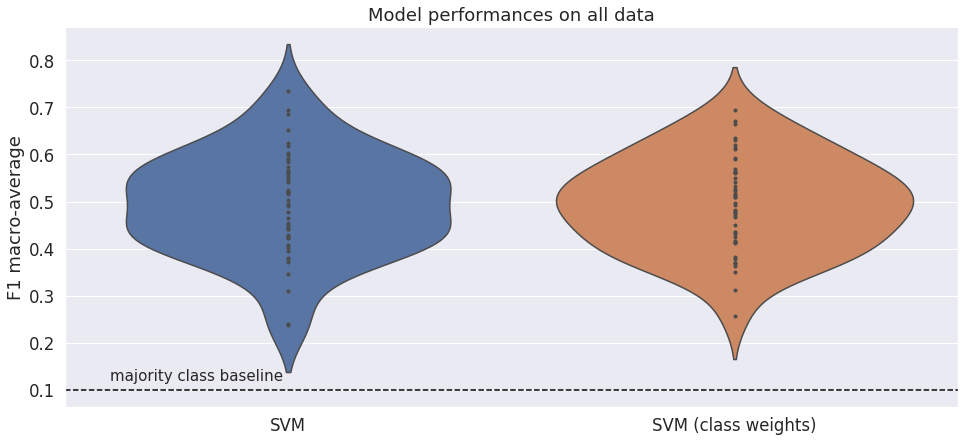

In [145]:
plot_boxplots(keys, values, title="Model performances on all data", models=["SVM (class weights)", "SVM"])

**Results**: Decision tree, Random forest and SVM improved from introducing class weights. 

## Experiment 3. Training with fewer features

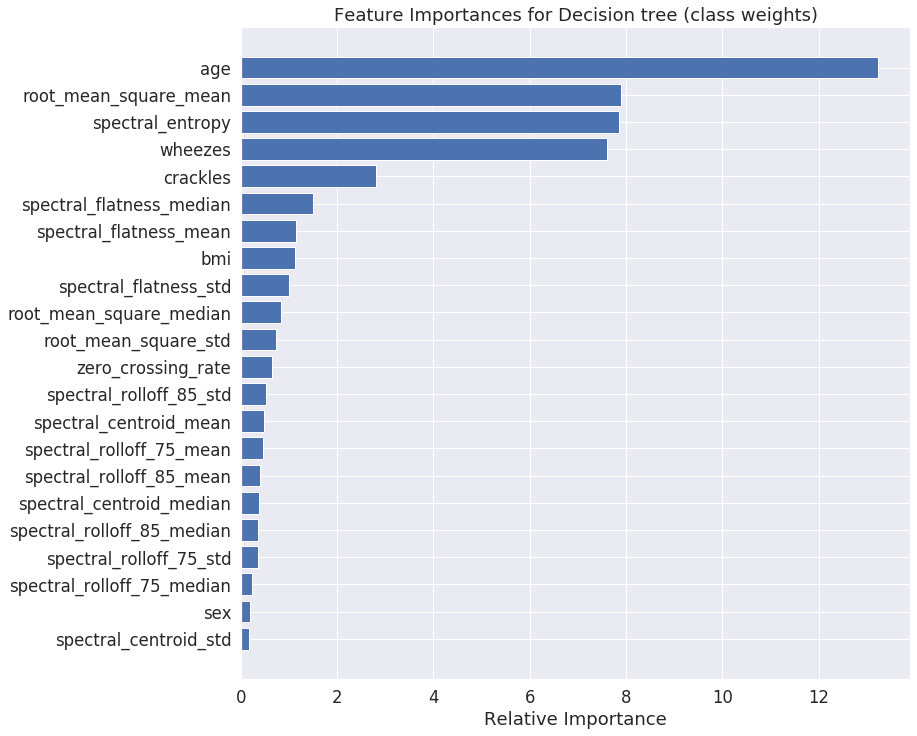

In [146]:
#Sum of all importances for all estimators used in cross validation
importances = [0] * len(list(data_x.columns))
for est in estimators["Decision tree (class weights)"]:
    importance = est.feature_importances_
    for i in range(len(importances)):
        importances[i] += importance[i]
        
sorted_indices = np.argsort(importances)
sorted_importances = np.sort(importances)

plt.figure(figsize=(12,12))

plt.title('Feature Importances for Decision tree (class weights)')
plt.barh(range(len(sorted_indices)), sorted_importances, color='b', align='center')
plt.yticks(range(len(sorted_indices)), [data_x.columns[i] for i in sorted_indices])
plt.xlabel('Relative Importance')
plt.show()

The following features have been selected because they show the largest difference between classes on the PCA plot.

In [147]:
fewer_features = ["wheezes","crackles","age", "root_mean_square_mean", "spectral_entropy", "spectral_flatness_mean", "zero_crossing_rate"]

In [163]:
sml_data_x = data_x[fewer_features]
sml_data_x.head()

,wheezes,crackles,age,root_mean_square_mean,spectral_entropy,spectral_flatness_mean,zero_crossing_rate
30,0.01004,0.00000,61.00,0.127445,8.080103,0.000002,0.001995
65,0.00000,0.28045,50.00,0.045628,9.701067,0.000023,0.006102
55,0.01255,0.00000,0.83,0.082301,8.976837,0.000043,0.003578
118,0.00000,0.00000,10.00,0.061411,8.945704,0.000015,0.002395
12,0.05020,0.00000,56.00,0.016826,9.458686,0.000251,0.018423


In [149]:
pca = PCA(2)
principal_components = pca.fit_transform(sml_data_x)
principal_components = pd.DataFrame(principal_components)
print("PCA accounts for", sum(pca.explained_variance_ratio_), "of the variance")

PCA accounts for 0.9999754612010476 of the variance


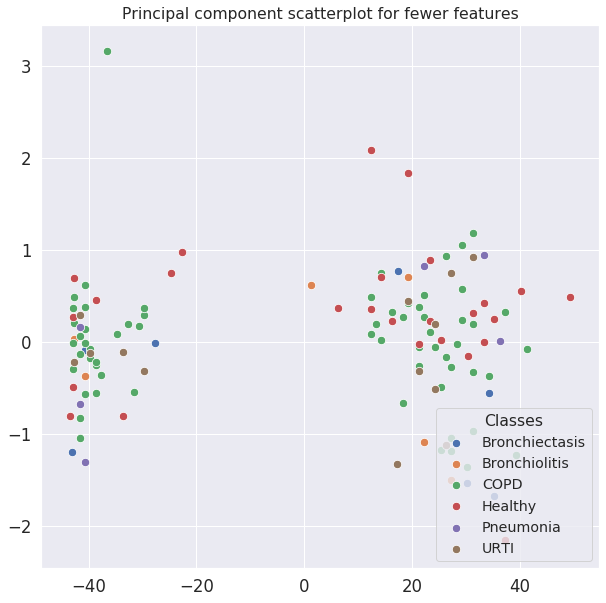

In [150]:
get_pca_scatterplot(principal_components, data_y, class_list, "Principal component scatterplot for fewer features")

Do these class similarities make sense?
1. Healthy people are similar to URTI. That makes sense. There is practically no way you can tell apart a person with URTI and a healthy person by listening to their lungs.

2. COPD patients are similar to Pneumonia. This makes some sense. Both diseases can have crackles and wheezes.

3. COPD patients are similar to Bronchiectasis. This makes some sense, since Bronchiectasis can be a result of COPD.

In [151]:
#Standardizing data, necessary for SVM
standard_sml_data_x = preprocessing.scale(sml_data_x.to_numpy())
standard_sml_data_x

array([[-5.46668275e-01, -7.93601811e-01,  5.41835850e-01,
         2.76985140e-01, -1.53424803e+00, -4.05406551e-01,
        -6.36647660e-01],
       [-6.51307572e-01,  1.77325163e+00,  1.97841804e-01,
        -7.02557664e-01,  5.26954402e-01, -3.92808990e-01,
        -1.79754749e-01],
       [-5.20508450e-01, -7.93601811e-01, -1.33981158e+00,
        -2.63488374e-01, -3.93970050e-01, -3.81211203e-01,
        -4.60509601e-01],
       [-6.51307572e-01, -7.93601811e-01, -1.05304563e+00,
        -5.13599960e-01, -4.33557465e-01, -3.98098183e-01,
        -5.92109000e-01],
       [-1.28111084e-01, -7.93601811e-01,  3.85474920e-01,
        -1.04737889e+00,  2.18745074e-01, -2.56861372e-01,
         1.19116945e+00],
       [ 2.29349657e+00, -7.93601811e-01,  1.16727957e+00,
        -2.47564337e-01,  7.38227588e-01, -4.06721764e-01,
         2.97245198e-01],
       [-6.51307572e-01, -7.93601811e-01, -1.27195093e+00,
        -5.57237306e-01, -1.08339886e+00, -3.91536466e-01,
        -1.6254213

In [152]:
models = [
    ("Decision tree (fewer features)", DecisionTreeClassifier()),
    ("Random forest (fewer features)", RandomForestClassifier(n_estimators=300, max_samples=0.3, max_features=0.8)),
    ("XGBoost (fewer features)", XGBClassifier(learning_rate=0.1, n_estimators=62, min_child_weight=3, max_depth=3, gamma=0)),
    ("SVM (fewer features)", SVC(kernel="sigmoid", C=40, gamma=0.025))
]

In [ ]:
sml_data_x["diagnosis"] = data_y

In [153]:
for item in models:    
    name = item[0]
    model = item[1]
    temp_f1 = []
    temp_f1_micro = []
    temp_y_preds = []
    temp_f1_train = []
    temp_estimators = []
    
    for _ in range(times):
        cv = cross_validate(estimator=model, 
                            X=standard_sml_data_x, 
                            y=data_y, 
                            cv=5, 
                            scoring=scoring, 
                            verbose=0, 
                            return_train_score=True,
                            return_estimator=True)
        cv_pred = cross_val_predict(estimator=model, X=sml_data_x, y=data_y, cv=5)
        temp_f1.extend(cv["test_f1_macro"])
        temp_f1_micro.extend(cv["test_f1_micro"])
        temp_f1_train.extend(cv["train_f1_macro"])
        temp_estimators.extend(cv["estimator"])
        temp_y_preds.extend(cv_pred)
        
    f1_scores[name] = temp_f1
    f1_micros[name] = temp_f1_micro
    f1_train_scores[name] = temp_f1_train
    y_preds[name] = temp_y_preds
    estimators[name] = temp_estimators

In [154]:
keys, values = prepare_dict(f1_scores)

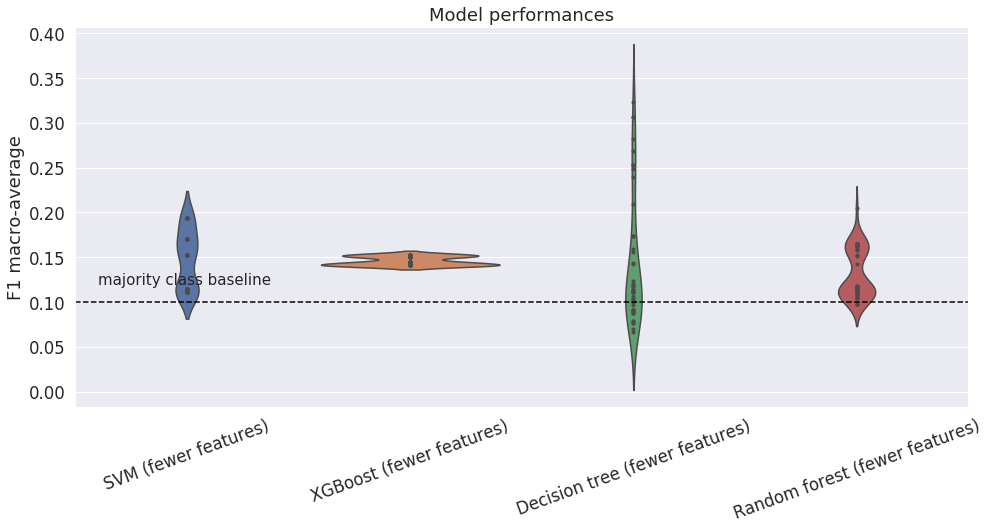

In [157]:
plot_boxplots(keys, values, rotation = 20, title = "Model performances", models=["Random forest (fewer features)", "XGBoost (fewer features)", "SVM (fewer features)", "Decision tree (fewer features)"])

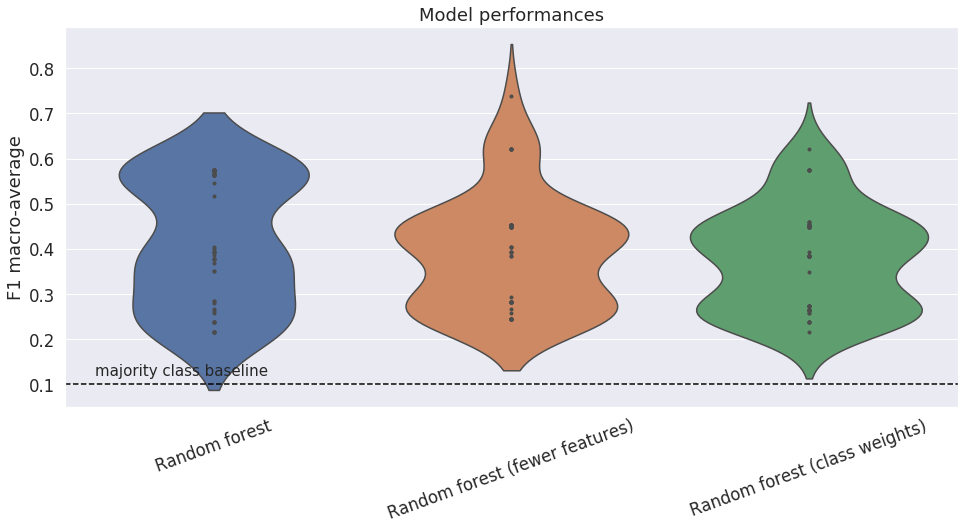

In [195]:
plot_boxplots(keys, values, rotation = 20, title = "Model performances", models=["Random forest", "Random forest (class weights)", "Random forest (fewer features)", "Random forest (size limit)"])

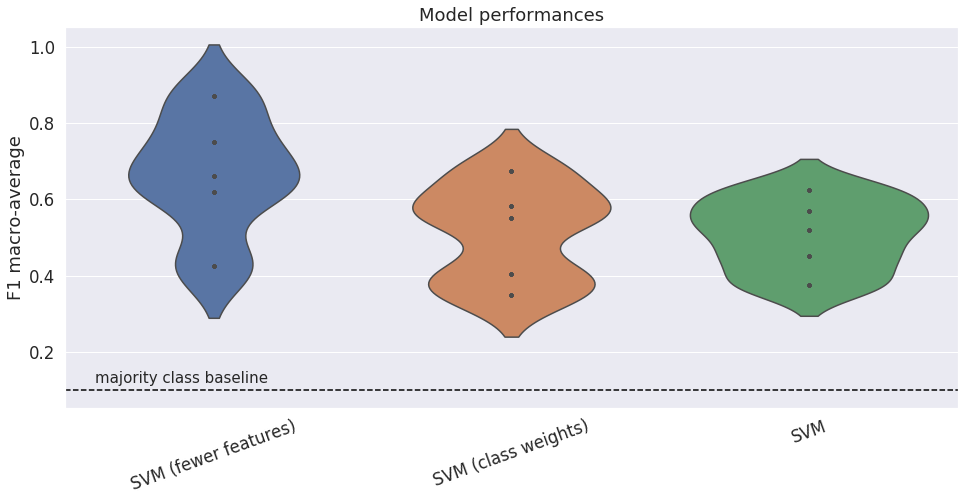

In [196]:
plot_boxplots(keys, values, rotation = 20, title = "Model performances", models=["SVM", "SVM (class weights)", "SVM (fewer features)"])

**Results**: Having fewer features helps all of the models.

### Conclusion

In [164]:
keys, values = prepare_dict(f1_scores)
for key, values in zip(keys, values):
    print(key, round(np.array(values).mean(), 4), "+/-", round(np.array(values).std(), 4))

Decision tree (class weights) 0.5266 +/- 0.1298
Decision tree 0.5079 +/- 0.1289
Decision tree (fewer features) 0.4982 +/- 0.1205
SVM (fewer features) 0.4976 +/- 0.1297
SVM 0.4941 +/- 0.1074
SVM (class weights) 0.4938 +/- 0.098
XGBoost 0.4792 +/- 0.1136
XGBoost (class weights) 0.4723 +/- 0.1484
XGBoost (fewer features) 0.4619 +/- 0.1272
Random forest 0.4051 +/- 0.1111
Random forest (class weights) 0.4014 +/- 0.0901
Random forest (fewer features) 0.3528 +/- 0.0862


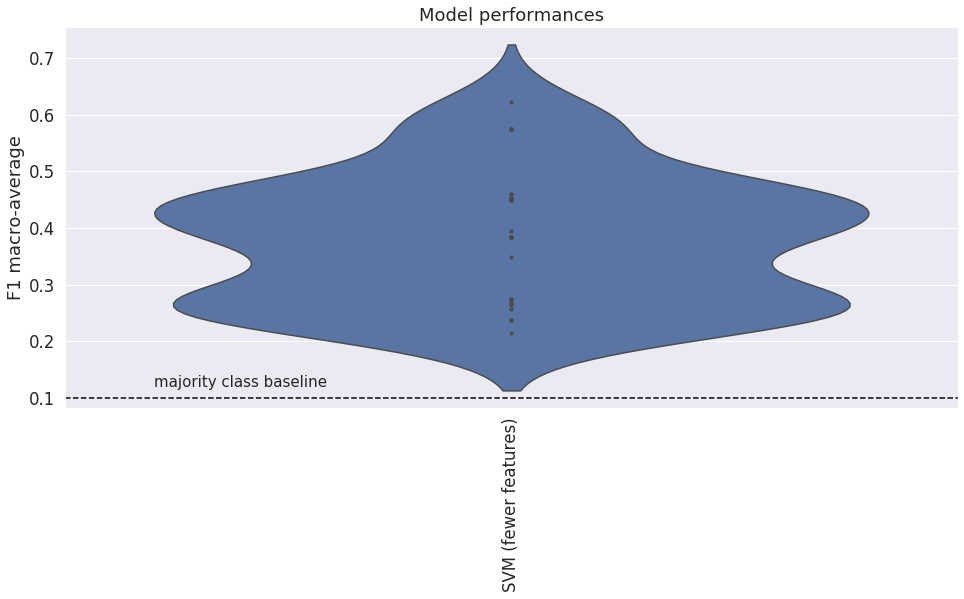

In [198]:
plot_boxplots(keys, values, rotation = 90, title = "Model performances")

The best versions of each model are the following.

In [199]:
print("Decision tree (class weights) score is", round(np.average(f1_scores["Decision tree (class weights)"]), 4))
print("SVM (fewer features)", round(np.average(f1_scores["SVM (fewer features)"]), 4))
print("XGBoost (fewer features) score is", round(np.average(f1_scores["XGBoost (fewer features)"]), 4))
print("Random forest (fewer features) score is", round(np.average(f1_scores["Random forest (fewer features)"]), 4))

Decision tree (class weights) score is 0.5568
SVM (fewer features) 0.6647
XGBoost (fewer features) score is 0.5191
Random forest (fewer features) score is 0.3914


Let's see if deep learning can do any better

# Deep learning

In [47]:
#Random operations
from random import randint, shuffle

from sklearn.metrics import f1_score

#Modules for the CNN
from keras.utils import to_categorical #Data prepration
from keras.models import Sequential #Layers
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import adam #Optimizer
from keras import regularizers #Regularizer
from keras.callbacks import EarlyStopping

#Item-wise addition of two lists
from operator import add

You should consider upgrading via the '/gpfs/hpc/home/rannilo/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 117 kB 2.2 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /gpfs/hpc/home/rannilo/venv/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-vqd90cbk/pygraphviz/setup.py'"'"'; __file__='"'"'/tmp/pip-install-vqd90cbk/pygraphviz/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-rknvjqdg
       cwd: /tmp/pip-install-vqd90cbk/pygraphviz/
  Complete output (56 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.6
  creating build/lib.linux-x86_64-3.6/pygraphviz
  copying pygraphviz/graphviz.py -> build/lib.linux-x86_64-3.6/pygraphviz
  copying pygraphviz/ve

You should consider upgrading via the '/gpfs/hpc/home/rannilo/venv/bin/python -m pip install --upgrade pip' command.


### Loading data

In [12]:
#Patients split into 5 folds. Selected such that each fold contains patient with every different disease.
patient_folds = np.load(root + "dataframes/equal_patient_folds.npy", allow_pickle=True)
#Pre-made dataframe containing all patients with all MFCCs
patient_mfccs_and_diagnosis = pd.read_pickle(root + "dataframes/per-patient-mfccs")
#Class names
classes = pd.read_pickle(root + "dataframes/class-codes-for-per-patient-mfcc.pkl")

In [13]:
patient_mfccs_and_diagnosis

,patient,mfcc,diagnosis
0,101,"[[[-364.57965, -403.9055, -474.42746, -457.100...",5
1,102,"[[[-290.7765, -330.7425, -501.79575, -537.1029...",3
2,104,"[[[-627.436, -524.2886, -430.52365, -415.77765...",2
3,105,"[[[-121.048325, -109.187744, -93.11778, -87.04...",5
4,106,"[[[-366.1252, -357.4237, -362.106, -361.76382,...",2
...,...,...,...
118,222,"[[[-182.06856, -223.55498, -290.90335, -274.43...",2
119,223,"[[[-401.4958, -387.4599, -380.213, -299.84357,...",2
120,224,"[[[-386.45297, -425.72656, -475.7035, -432.176...",3
121,225,"[[[-408.5572, -441.47882, -470.48624, -465.227...",3


In [14]:
classes = list(classes[0])
classes

['Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'Pneumonia', 'URTI']

In [15]:
patient_folds

array([list([106, 132, 123, 225, 178, 118, 133, 140, 145, 205, 173, 198, 188, 126, 194, 116, 208, 112, 141, 189, 128, 162, 135, 174]),
       list([137, 134, 179, 102, 168, 124, 209, 155, 185, 151, 130, 150, 172, 129, 216, 131, 154, 167, 221, 101, 219, 110, 143, 113]),
       list([223, 121, 200, 190, 214, 193, 183, 211, 105, 217, 160, 146, 207, 181, 122, 199, 180, 164, 120, 127, 157, 111, 206, 202]),
       list([201, 186, 169, 195, 148, 107, 144, 226, 196, 114, 171, 184, 158, 136, 161, 224, 177, 175, 166, 203, 153, 187, 142, 117]),
       list([163, 156, 138, 197, 212, 204, 170, 165, 218, 104, 109, 210, 149, 147, 159, 176, 222, 215, 192, 119, 191, 152, 139, 182, 213, 125, 220])],
      dtype=object)

In [16]:
#Contains 20 MFCCs (one for each soundfile) with the size 40x431.
temp_all = []
for _, row in patient_mfccs_and_diagnosis.iterrows():
    temp_all.extend(row.mfcc)
np.array(temp_all).shape

(917, 40, 431)

In [17]:
temp_diagnosis_per_soundfile = []
for _, row in patient_mfccs_and_diagnosis.iterrows():
    temp_diagnosis_per_soundfile.extend(len(row.mfcc)*[classes[row.diagnosis]])

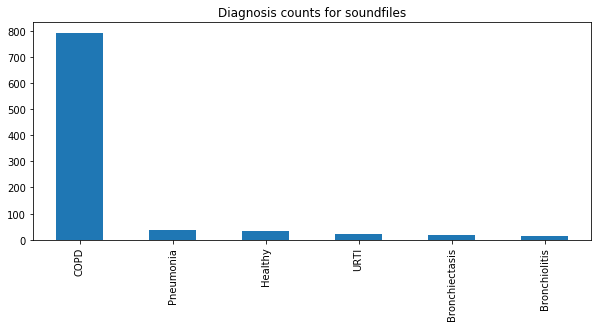

In [18]:
plt.figure(figsize=(10,4))
pd.array(temp_diagnosis_per_soundfile).value_counts().plot(kind="bar", title="Diagnosis counts for soundfiles")


### Training

In [19]:
#Storing hyperparameters here
class Config(object):
    def __init__(self, n_mfcc, max_frames, sample_rate, max_audio_duration, batch_size, epochs):
        self.n_mfcc = n_mfcc
        self.max_frames = max_frames
        self.sample_rate = sample_rate
        self.max_audio_duration = max_audio_duration
        self.max_audio_length = max_audio_duration * sample_rate
        self.batch_size = batch_size
        self.epochs = epochs

In [20]:
config = Config(n_mfcc=40, 
                max_frames=862, 
                sample_rate = 11025, 
                max_audio_duration = 20, 
                batch_size = 64, 
                epochs = 700)

In [21]:
"""def m_f1_macro(y_true, y_pred):
    res = f1_score(y_pred=y_pred, y_true=y_true, average="macro")
    return f1_score
    
    """

'def m_f1_macro(y_true, y_pred):\n    res = f1_score(y_pred=y_pred, y_true=y_true, average="macro")\n    return f1_score\n    \n    '

In [22]:
#Returns CNN model
# TODO: maini - overfitib sest vähe andmeid

def get_model(config):
    
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=2, input_shape=(40,431,1), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(filters=32, kernel_size=2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.4))

    model.add(Conv2D(filters=64, kernel_size=2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.4))
    
    model.add(GlobalAveragePooling2D())

    model.add(Dense(len(classes), activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', 
                  metrics=['accuracy'], 
                  optimizer=adam(amsgrad=True)) 
    
    return model

In [41]:
np.array(patient_mfccs_and_diagnosis.mfcc[0]).shape

(2, 40, 431)

In [220]:
#Global variables
cnn_f1_scores = {}
cnn_f1_train_scores = {}
cnn_y_preds = {}
cnn_y_train_preds = {}
cnn_histories = {}

In [221]:
#These are the actual diagnoses
temp_df = patient_mfccs_and_diagnosis.copy()
temp_df.set_index("patient", inplace=True) #To be able to get row by patient
cnn_y_actuals = []
for fold in patient_folds:
    for patient in fold:
        cnn_y_actuals.append(temp_df.loc[patient].diagnosis)

In [222]:
patient_folds

array([list([106, 132, 123, 225, 178, 118, 133, 140, 145, 205, 173, 198, 188, 126, 194, 116, 208, 112, 141, 189, 128, 162, 135, 174]),
       list([137, 134, 179, 102, 168, 124, 209, 155, 185, 151, 130, 150, 172, 129, 216, 131, 154, 167, 221, 101, 219, 110, 143, 113]),
       list([223, 121, 200, 190, 214, 193, 183, 211, 105, 217, 160, 146, 207, 181, 122, 199, 180, 164, 120, 127, 157, 111, 206, 202]),
       list([201, 186, 169, 195, 148, 107, 144, 226, 196, 114, 171, 184, 158, 136, 161, 224, 177, 175, 166, 203, 153, 187, 142, 117]),
       list([163, 156, 138, 197, 212, 204, 170, 165, 218, 104, 109, 210, 149, 147, 159, 176, 222, 215, 192, 119, 191, 152, 139, 182, 213, 125, 220])],
      dtype=object)

In [245]:
data_y

0      5
1      3
2      2
3      5
4      2
      ..
116    2
117    2
118    3
119    3
120    4
Name: diagnosis, Length: 121, dtype: int64

In [250]:
#Training + testing
#5 foldy CV

#Predicting the diagnosis of each patient 
#by summing the prediction probabilities 
#of each soundfile for each patient

def get_results_with_model(dataframe, patient_folds, class_weights = None, fold_nr=None, verbose=0):
    histories = []
    predicted_y = []
    train_predicted_y = []
    f1_scores = []
    f1_train_scores = []
    
    if fold_nr is not None:
        patient_folds = [patient_folds[fold_nr]]
    for _ in range(9):
        for test_patients in patient_folds:
            X_train = []
            y_train = []
            test_rows = []
            train_rows = []

            #Gathering train and test rows
            for _, row in dataframe.iterrows():
                if (row.patient in test_patients):
                    test_rows.append(row)
                else:
                    train_rows.append(row)

            #Data preparation
            shuffle(train_rows)

            for row in train_rows:
                np.array(row.mfcc)
                X_train.extend(row.mfcc)
                y_train.extend([row.diagnosis]*len(row.mfcc))

            X_train = np.array(X_train)
            X_train = np.expand_dims(X_train, -1)

            y_train = np.array(y_train)
            y_train = to_categorical(y_train)

            val_split = int(len(X_train)*0.2)
            X_val = X_train[:val_split]
            y_val = y_train[:val_split]
            X_train = X_train[val_split:]
            y_train = y_train[val_split:]

            #Training
            model = get_model(config)
            es = EarlyStopping(monitor='val_loss', mode='min', verbose=verbose, patience=50)
            history = model.fit(x=X_train, 
                                y=y_train, 
                                batch_size=config.batch_size, 
                                epochs=config.epochs, 
                                validation_data=(X_val, y_val), 
                                verbose=verbose,
                                callbacks=[es],
                               class_weight=class_weights)    
            histories.append(history)

            #Getting results with the model
            cur_fold_test_predicted = []
            cur_fold_test_actuals = []
            cur_fold_train_predicted = []
            cur_fold_train_actuals = []

            #Test results
            for row in test_rows:
                mfccs = row.mfcc
                patient = row.patient
                summed_predictions = [0]*6 #Sum of predictions for one patient
                for mfcc in mfccs: #All soundfiles for one patient
                    x = np.array([mfcc])
                    x = np.expand_dims(x, -1)
                    prediction = model.predict(x)
                    summed_predictions = list(map(add, summed_predictions, prediction))
                cur_fold_test_predicted.append(np.argmax(summed_predictions)) #Diagnosis with highest prediction probability
                cur_fold_test_actuals.append(row.diagnosis)

            #Train results
            for row in train_rows:
                mfccs = row.mfcc
                patient = row.patient
                summed_predictions = [0]*6
                for mfcc in mfccs:
                    x = np.array([mfcc])
                    x = np.expand_dims(x, -1)
                    prediction = model.predict(x)
                    summed_predictions = list(map(add, summed_predictions, prediction))
                cur_fold_train_predicted.append(np.argmax(summed_predictions)) 
                cur_fold_train_actuals.append(row.diagnosis)

            f1_scores.append(f1_score(y_pred=cur_fold_test_predicted, y_true=cur_fold_test_actuals, average="macro"))
            f1_train_scores.append(f1_score(y_pred=cur_fold_train_predicted, y_true=cur_fold_train_actuals, average="macro"))
            predicted_y.append(cur_fold_test_predicted) 
            train_predicted_y.append(cur_fold_train_predicted)
    return histories, predicted_y, train_predicted_y, f1_scores, f1_train_scores

In [251]:
histories, predicted_y, train_predicted_y, f1_scores, f1_train_scores = get_results_with_model(patient_mfccs_and_diagnosis, patient_folds, verbose=0)

In [254]:
cnn_f1_scores["CNN"] = f1_scores
cnn_f1_train_scores["CNN"] = f1_train_scores
cnn_y_preds["CNN"] = predicted_y
cnn_y_train_preds["CNN"] = train_predicted_y
cnn_histories["CNN"] = histories

In [259]:
np.mean((np.array(cnn_f1_scores["CNN (class weights)"])))

0.21423265749641462

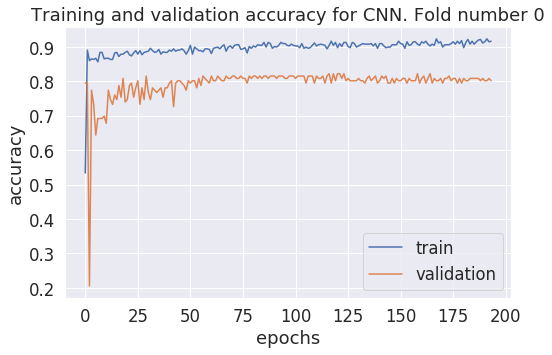

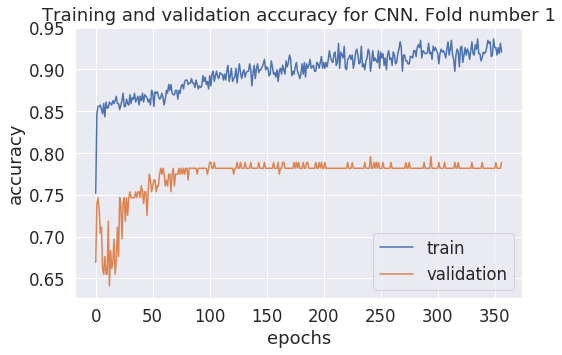

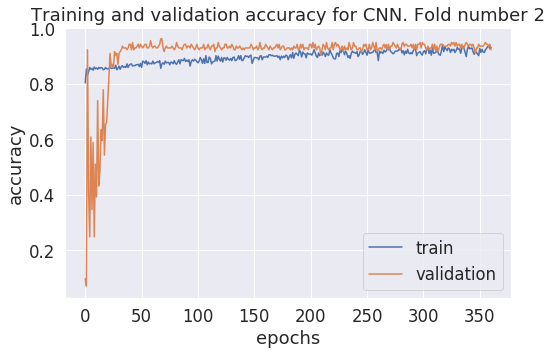

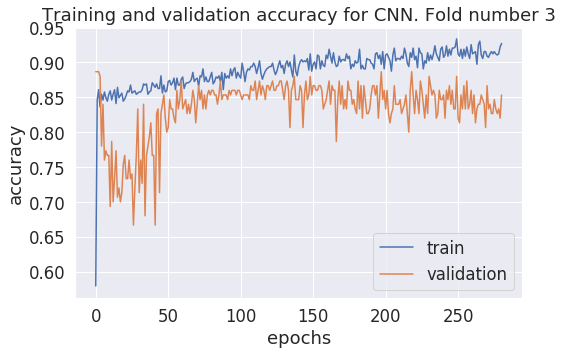

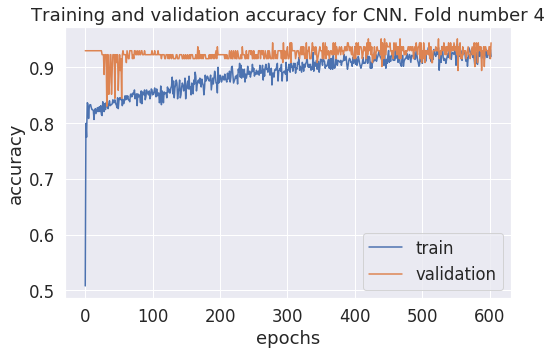

In [232]:
for i, history in enumerate(cnn_histories["CNN"]):
    #summarizing history of training
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.title("Training and validation accuracy for CNN. Fold number " + str(i))
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend()
    plt.show()

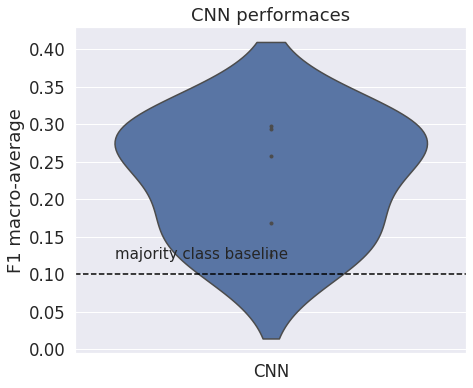

In [233]:
keys, values = prepare_dict(cnn_f1_scores)
plot_boxplots(keys, values, title="CNN performaces", figsize=(7, 6), models=["CNN"])

In [234]:
for key, values in zip(keys, values):
    print(key, round(np.array(values).mean(), 4), 
          "+/-", round(np.array(values).std(), 4))

CNN 0.2286 +/- 0.069


In [235]:
plot_confusion_matrix(y_pred = [item for sublist in cnn_y_preds["CNN"] for item in sublist], 
                      y_true=cnn_y_actuals, classes = list(classes[0]), title="CNN confusion matrix", rotation=30)

ValueError: Shape of passed values is (6, 6), indices imply (14, 14)

### Training with class weights

In [260]:
class_weights = {0:(793/16), 1:(793/13), 2:1, 3:(793/35), 4:(793/37), 5:(793/23)}

In [ ]:
histories, predicted_y, train_predicted_y, f1_scores, f1_train_scores = get_results_with_model(patient_mfccs_and_diagnosis, patient_folds, class_weights = class_weights, verbose=0)

cnn_f1_scores["CNN (class weights)"] = f1_scores
cnn_f1_train_scores["CNN (class weights)"] = f1_train_scores
cnn_y_preds["CNN (class weights)"] = predicted_y
cnn_y_train_preds["CNN (class weights)"] = train_predicted_y
cnn_histories["CNN (class weights)"] = histories

In [ ]:
cnn_f1_scores

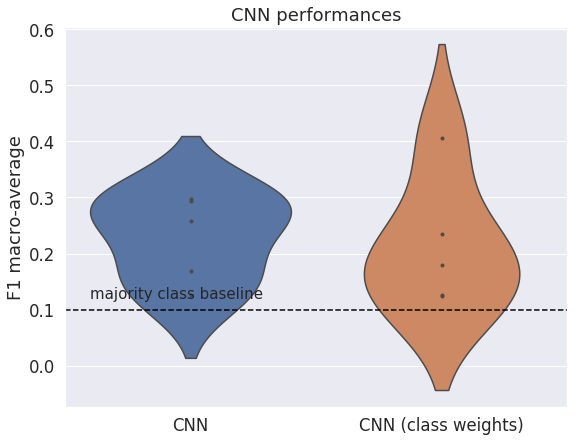

In [244]:
keys, values = prepare_dict(cnn_f1_scores)
plot_boxplots(keys, values, title="CNN performances", figsize=(9, 7), models=["CNN", "CNN (class weights)"])
#TODO scatterplot box asemel?
# tulemused erinevad: vähe andmepunkte - eri foldid on erinevad, erinevad maailmad.  
# tulemused erinevad: lisaks, närvivõrkude eri alguspunktid on erinevad. 

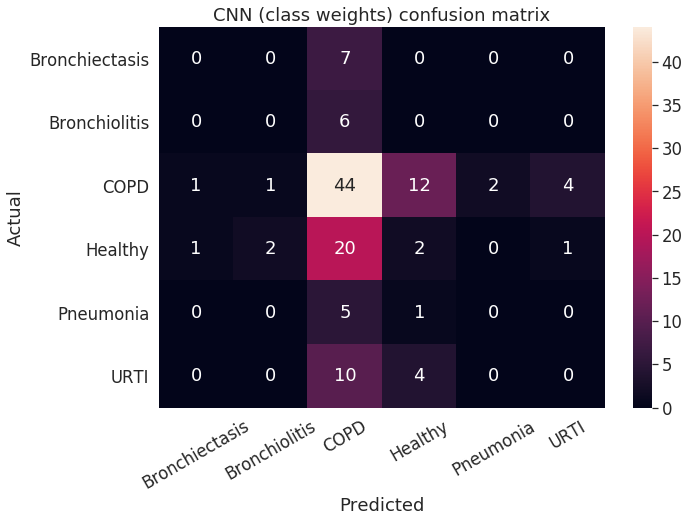

In [456]:
plot_confusion_matrix(y_pred = [item for sublist in cnn_y_preds["CNN (class weights)"] for item in sublist], 
                      y_true=cnn_y_actuals, classes=list(classes[0]), title="CNN (class weights) confusion matrix", rotation=30)

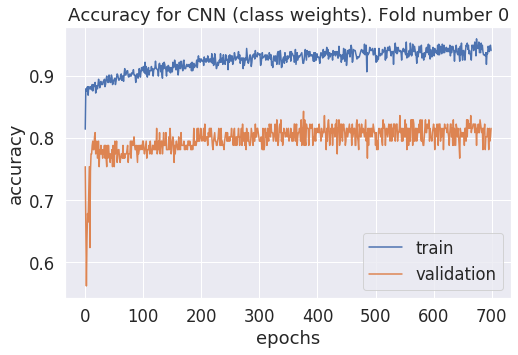

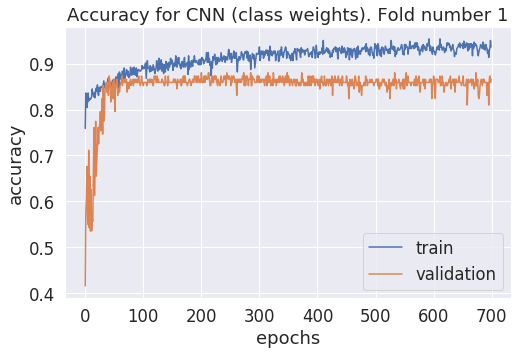

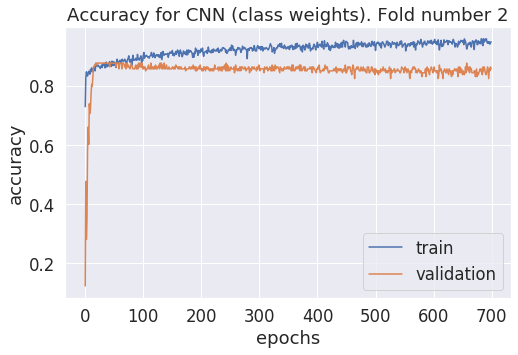

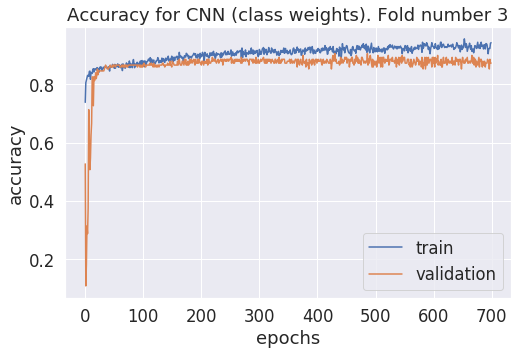

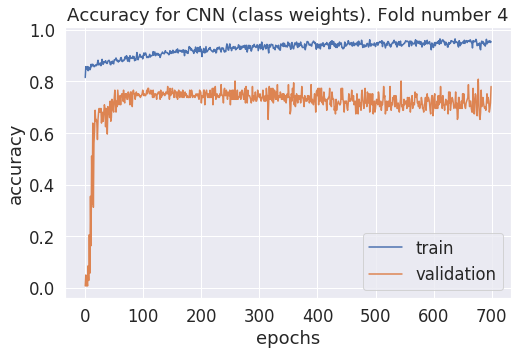

In [469]:
for i, history in enumerate(cnn_histories["CNN (class weights)"]):
    #summarizing history of training
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.title("Accuracy for CNN (class weights). Fold number " + str(i))
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend()
    plt.show()

### Training with augmented data

In [413]:
augmented_data = pd.read_pickle(root + "dataframes/augmented-per-patient-mfccs")
augmented_data

,patient,mfcc,diagnosis
0,101,"[[[-423.7245, -381.56204, -422.41003, -454.262...",5
1,102,"[[[-759.04236, -537.02466, -488.68433, -507.62...",3
2,104,"[[[-868.99054, -581.1276, -359.93866, -340.816...",2
3,105,"[[[-765.08813, -452.0647, -207.62025, -120.877...",5
4,106,"[[[-759.99854, -715.9552, -410.7162, -286.9652...",2
...,...,...,...
118,222,"[[[-231.2874, -177.46526, -225.4028, -416.9115...",2
119,223,"[[[-231.2874, -177.46526, -225.4028, -416.9115...",2
120,224,"[[[-132.88683, -185.02011, -422.6548, -408.395...",3
121,225,"[[[-603.271, -506.09457, -421.13794, -395.9152...",3


In [414]:
cnn_f1_scores["CNN augmented data"] = []
cnn_f1_train_scores["CNN augmented data"] = []
cnn_y_preds["CNN augmented data"] = []
cnn_y_train_preds["CNN augmented data"] = []
cnn_histories["CNN augmented data"] = []

In [478]:
histories, predicted_y, train_predicted_y, f1_scores, f1_train_scores = get_results_with_model(augmented_data, patient_folds, fold_nr = 2)

cnn_f1_scores["CNN augmented data"].extend(f1_scores)
cnn_f1_train_scores["CNN augmented data"].extend(f1_train_scores)
cnn_y_preds["CNN augmented data"].extend(predicted_y)
cnn_y_train_preds["CNN augmented data"].extend(train_predicted_y)
cnn_histories["CNN augmented data"].extend(histories)

In [477]:
cnn_f1_train_scores

{'CNN': [0.6580386150561589,
  0.7711832192964269,
  0.5101553166069294,
  0.6820310919609985,
  0.6517073381668276],
 'CNN (class weights)': [0.4238460135011859,
  0.6520731345497702,
  0.6896198830409356,
  0.6618456225013601,
  0.618155710582078],
 'CNN augmented data': [0.6300680995118878, 0.6119245678069207]}

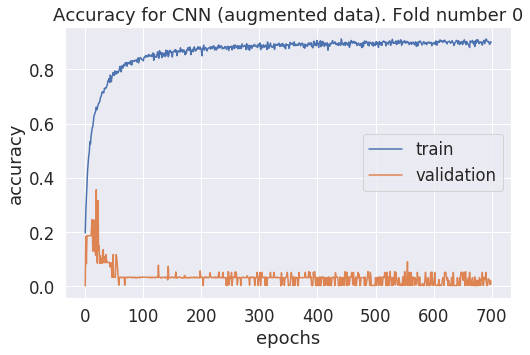

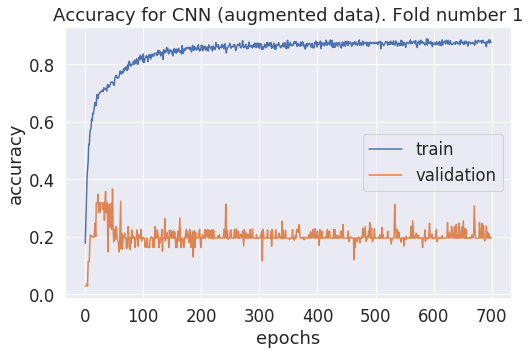

In [476]:
for i, history in enumerate(cnn_histories["CNN augmented data"]):
    #summarizing history of training
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.title("Accuracy for CNN (augmented data). Fold number " + str(i))
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend()
    plt.show()

In [418]:
cnn_f1_scores

{'CNN': [0.3172043010752688,
  0.3863636363636364,
  0.16526610644257703,
  0.3252380952380952,
  0.5597883597883598],
 'CNN (class weights)': [0.34761904761904766,
  0.39492753623188404,
  0.1923536439665472,
  0.26913580246913577,
  0.22857142857142856],
 'CNN augmented data': [0.1406926406926407]}

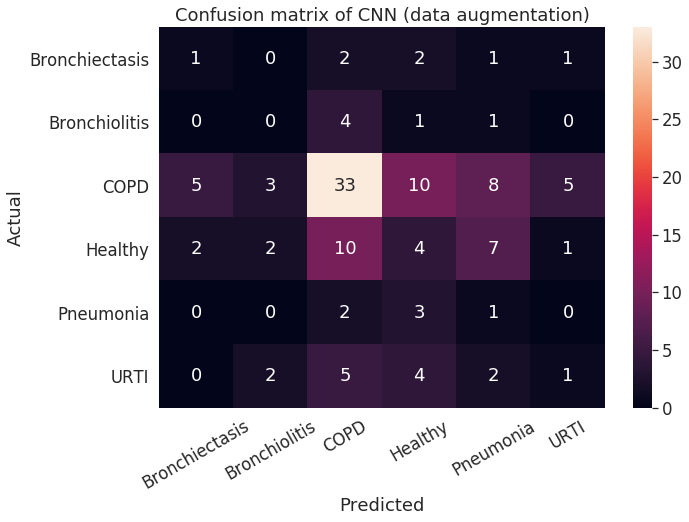

In [473]:
plot_confusion_matrix(y_pred = [2, 2, 0, 3, 2, 3, 3, 2, 2, 4, 4, 0, 3, 1, 3, 3, 3, 1, 3, 2, 2, 2, 3, 2, 1, 4, 2, 0, 3, 1, 1, 2, 2, 2, 5, 4, 4, 2, 2, 1, 4, 3, 2, 3, 3, 1, 4, 4, 2, 2, 5, 3, 4, 3, 3, 2, 3, 4, 3, 3, 2, 2, 4, 2, 2, 2, 0, 4, 2, 4, 2, 4, 5, 0, 0, 2, 2, 2, 2, 3, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 3, 2, 3, 2, 2, 5, 5, 5, 2, 4, 4, 2, 2, 2, 2, 0, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 3, 4, 4]
, 
                      y_true=cnn_y_actuals, classes=list(classes[0]), title="Confusion matrix of CNN (data augmentation)", rotation=30)

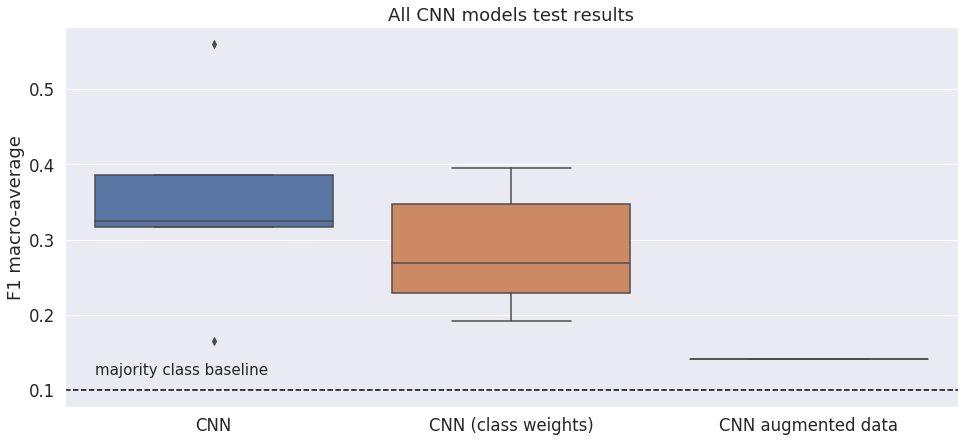

In [474]:
keys, values = prepare_dict(cnn_f1_scores)
plot_boxplots(keys, values, title="All CNN models test results")

# Results + Project poster

Here is an high-level overview of the project and all of the results for all of the experiments

![alt text](https://i.imgur.com/SHuBk5C.jpg)